# Einfluss von kongruenter Blickrichtung und Art des Stimulus auf Reaktionszeit und Treffsicherheit

Im folgenden Experiment sollte überprüft werden, ob sich die Blickrichtung zweier Stimuli auf die Reaktionszeit und die Genauigkeit bei der Beantwortung der Frage nach der Art des Stimulus auswirkt.
Es wurden immer zwei identische Stimuli präsentiert, wobei es sich entweder um einen Mensch oder um einen Greeble (nach Robert Abelson) handelte.
Es wurde vermutet, dass bei sich zugewandten Stimuli - unabhängig von der Art des Stimulus - die Reaktionszeit und die Treffsicherheit verbessert sind, da so der Beobachter die Stimuli eher als interagierende Gruppe wahrnimmt und daher schneller und besser verarbeitet (Papeo, Stein & Soto-Faraco, 2017).
Weiterhin wurde vermutet, dass sich sowohl die Reaktionszeit, als auch die Treffsicherheit verbessern, wenn es sich bei dem Stimulus um einen Mensch handelt, da es für Menschen gewohnter ist, menschliche Wesen in einer Gruppe zu sehen.
Insgesamt lassen sich 6 Hypothesen zur Art der Auswirkung formulieren:

1) Wenn sich die Stimuli ansehen (congruency = 1), ist die Reaktionszeit (RT) - unanhängig von der Art des Stimulus - niedriger im Vergleich zu Trials mit sich nicht ansehenden Stimuli (congruency = 0).

2) Wenn sich die Stimuli ansehen , ist die Treffsicherheit (accuracy) - unanhängig von der Art des Stimulus - besser im Vergleich zu Trials mit sich nicht ansehenden Stimuli.

3) Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die Reaktionszeit niedriger im Vergleich zu Trials mit Greebles.

4) Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die Treffsicherheit verbessert im Vergleich zu Trials mit Greebles.

5) Es gibt einen Interaktionseffekt zwischen Typ des Stimulus und Kongruenz der Blickrichtung bezüglich der RT

6) Es gibt einen Interaktionseffekt zwischen Typ des Stimulus und Kongruenz der Blickrichtung bezüglich der Accuracy

Um diese Hypothesen zu prüfen, wurden die folgenden 4 Bedingungen formuliert:
- Linkes Bild mit Blick nach rechts und rechtes Bild mit Blick nach links (kongruente Bedingung)
- Linkes Bild mit Blick nach links und rechtes Bild mit Blick nach links (inkongruente Bedingung)
- Linkes Bild mit Blick nach links und rechtes Bild mit Blick nach rechts (inkongruente Bedingung)
- Linkes Bild mit Blick nach rechts und rechtes Bild mit Blick nach rechts (inkongruente Bedingung)

Jede dieser 4 Bedingungen gab es sowohl für Stimulus Mensch, als auch für Stimulus Greeble, wodurch ingesamt 8 Trials für einen Block entstanden. Das Experiment bestand aus 4 mal 8 Trials, wobei randomisiert war, in welcher Reihenfolge die Bedingungen innerhalb eines Blocks vorkamen.
Die Aufgabe der Probanden war es, die Art des Stimulus durch Tastendruck anzugeben, wobei y für einen menschlichen und m für einen Greeble Stimulus gedrückt werden sollte. Dabei sollte so schnell und so genau wie möglich geantwortet werden.

In [1]:
#Importieren von Pandas
#Importieren des T-Tests von Psychopy

%matplotlib inline
import pandas as pd
from scipy.stats import ttest_ind

In [2]:
#Importieren der Datensätze, sowie Ausschluss der Trials mit Reaktionszeiten <100ms und >2s

from glob import glob
all_dfs = list()
for ii, file in enumerate (glob("./csv/*")):
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(file)
            df = df.query("100 < response_time < 2000")
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs)

In [3]:
#Ausschluss der Daten, die für die weiteren Berechnungen irrelevant sind bzw. Einschluss der folgenden Spalten:
#1) Kongruenz der Blickrichtung der Stimuli (congruency), 1=kongruent, 0=inkongruent
#2) Korrekte Antwort im entsprechenden Trial (correct_response), y=Mensch, m =Greeble
#3) Gegebene Antwort im entsprechenden Trial (response)
#4) Reaktionszeit (response_time)
#5) Probandennummer (subject_nr)
#6) Typ des Stimulus (type), Human=Mensch, Greeble=Greeble

col_list = ["congruency", "correct_response", "response", "response_time", "subject_nr", "type"]
df = df[col_list]
df.head()

,congruency,correct_response,response,response_time,subject_nr,type
1,0,y,y,359.418588,3,Human
2,1,y,m,251.538913,3,Human
3,0,y,y,318.610002,3,Human
4,0,y,y,304.901065,3,Human
5,0,m,m,377.023761,3,Greeble


In [4]:
#Ersetzen der Typbezeichnungen "Human" und "Greeble" durch die Werte 0 und 1
df=df.replace("Human", 0)
df=df.replace("Greeble", 1)
df.head()

,congruency,correct_response,response,response_time,subject_nr,type
1,0,y,y,359.418588,3,0
2,1,y,m,251.538913,3,0
3,0,y,y,318.610002,3,0
4,0,y,y,304.901065,3,0
5,0,m,m,377.023761,3,1


In [5]:
#Erstellen einer neuen Spalte (accuracy) im Datensatz für korrekte bzw. nicht korrekte Antwort
#True=korrekte Antwort, False=nicht korrekte Antwort
is_corr = df["correct_response"] == df["response"]
df["accuracy"] = is_corr
df.head()

,congruency,correct_response,response,response_time,subject_nr,type,accuracy
1,0,y,y,359.418588,3,0,True
2,1,y,m,251.538913,3,0,False
3,0,y,y,318.610002,3,0,True
4,0,y,y,304.901065,3,0,True
5,0,m,m,377.023761,3,1,True


In [6]:
#Aggregation über die Trials derselben Bedingungen jedes Probanden in einem neuen Datensatz
df_by_subj = df.groupby(("subject_nr", "type", "congruency"))["response_time", "accuracy"].mean().reset_index()
df_by_subj

,subject_nr,type,congruency,response_time,accuracy
0,1,0,0,318.337434,1.000000
1,1,0,1,308.359801,0.875000
2,1,1,0,345.395721,0.875000
3,1,1,1,320.939416,0.875000
4,2,0,0,304.262685,0.958333
5,2,0,1,292.407102,0.875000
6,2,1,0,301.359499,0.833333
7,2,1,1,296.220701,1.000000
8,3,0,0,366.945719,0.875000
9,3,0,1,366.573448,0.750000


# Deskriptivstatistik

In [7]:
df_by_subj.describe()

,subject_nr,type,congruency,response_time,accuracy
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.000000,0.500000,0.500000,367.770230,0.933152
std,1.450953,0.512989,0.512989,67.254975,0.074583
min,1.000000,0.000000,0.000000,292.407102,0.750000
25%,2.000000,0.000000,0.000000,315.843026,0.875000
50%,3.000000,0.500000,0.500000,355.984585,0.958333
75%,4.000000,1.000000,1.000000,396.779861,1.000000
max,5.000000,1.000000,1.000000,508.033660,1.000000


In [8]:
rt_cond = df.groupby(["congruency", "type"])["response_time", "accuracy"]
rt_cond.mean()

response_time  accuracy
congruency type                         
0          0        378.961604  0.958333
           1        384.510371  0.924370
1          0        352.416569  0.897436
           1        349.874741  0.948718

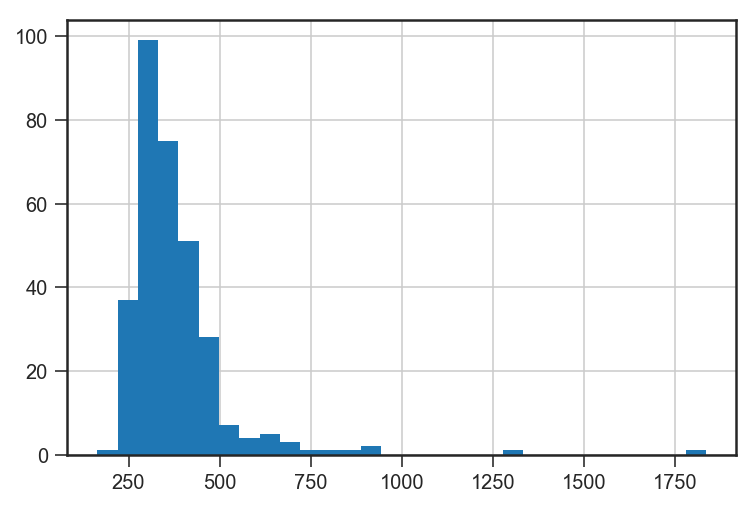

In [9]:
#Histogramm zur Veranschaulichung der Verteilung der Reaktionszeiten
df["response_time"].hist(bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1839e358>,
      dtype=object)

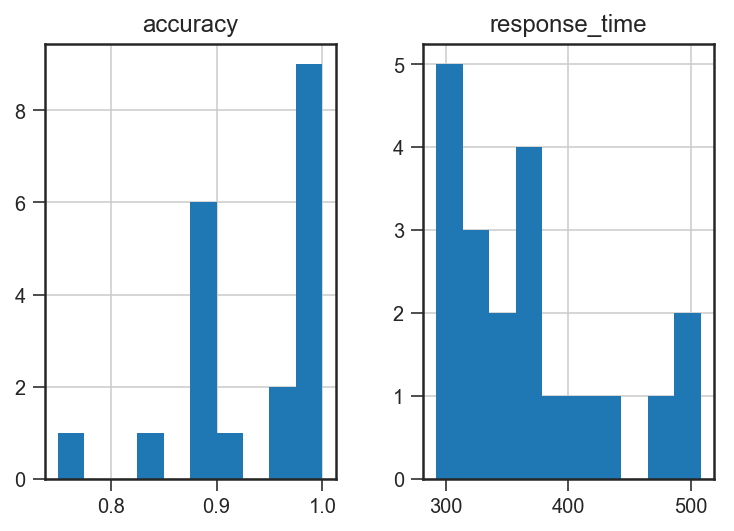

In [10]:
#Histogramm zur Veranschaulichung der aggregierten Daten hinsichtlich der Reaktionszeit (links) und der Treffsicherheit (rechts)
df_by_subj[["response_time", "accuracy"]].hist()

# T-Tests

In [11]:
#Definieren von zwei Subsamples mit kongruenter Blickrichtung und inkongruenter Blickrichtung bzgl. der Reaktionszeit
blickr_incongr = df_by_subj.query("congruency == 0")["response_time"]
blickr_congr = df_by_subj.query("congruency == 1")["response_time"]

#T-Test für Gruppen mit kongruenter und nicht kongruente Blickrichtung; Hypothese 1:
#"Wenn sich die Stimuli ansehen, ist die Reaktionszeit niedriger im Vergleich zu Trials mit sich nicht ansehenden Stimuli"
#t-Test nicht notwendig, aber zur ersten Veranschaulichung gerechnet
ttest_ind(blickr_incongr, blickr_congr)

Ttest_indResult(statistic=0.9282676379723378, pvalue=0.3655501414527432)

Mit einem t-Wert von 0,93 und einem p-Wert von 0,27 ist der Unterschied zwischen den beiden Gruppen nicht signifikant. Die Blickrichtung der Stimuli hat somit keinen signifikanten Einfluss auf die Reaktionszeit.

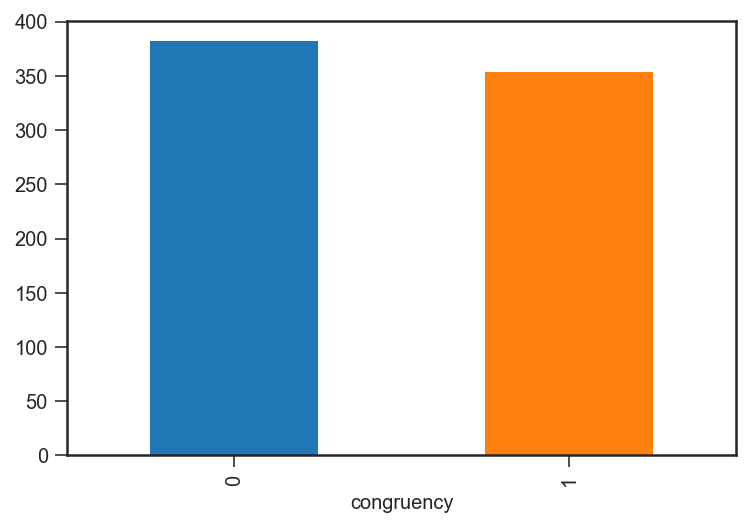

In [12]:
#Balkendiagramm zur Hypothese 1
rt_blickr = df_by_subj.groupby("congruency").mean()["response_time"]
rt_blickr.plot(kind = "bar")

In dem Histogramm ist eine leichte Tendenz zu einer schnelleren Reaktionszeit bei sich ansehenden Stimuli (congruency = 1) zu erkennen, was der Hypothese 1 entspricht.

In [13]:
#Definieren von zwei weiteren Subsamples mit kongruenter Blickrichtung und inkongruenter Blickrichtung bzgl. der Treffsicherheit (accuracy)
blickr_incongr = df_by_subj.query("congruency == 0")["accuracy"]
blickr_congr = df_by_subj.query("congruency == 1")["accuracy"]

#T-Test für Gruppen kongruente und nicht kongruente Bedingung; Hypothese 2:
ttest_ind(blickr_incongr, blickr_congr)

Ttest_indResult(statistic=0.4788046930750817, pvalue=0.6378422828120757)

Mit einem t-Wert von 0,48 und einem p-Wert von 0,63 ist der Unterschied zwischen den beiden Gruppen nicht signifikant. Die Blickrichtung der Stimuli hat somit keinen signifikanten Einfluss auf die Treffsicherheit.

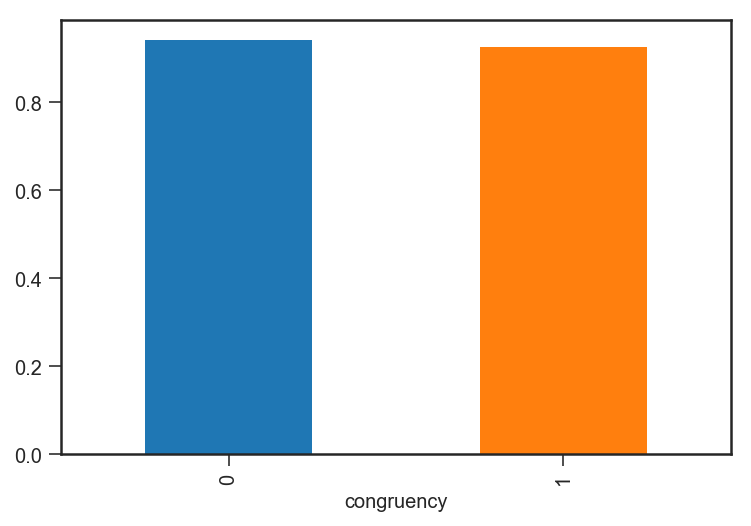

In [14]:
#Balkendiagramm zu Hypothese 2
acc_blickr = df_by_subj.groupby("congruency").mean()["accuracy"]
acc_blickr.plot(kind = "bar")

Hier ist keine augenscheinliche Tendenz zu erkennen.

In [15]:
#Definieren von zwei Subsamples mit Stimulus "Mensch" und "Greeble" bzgl. der Reaktionszeit
type_human = df_by_subj.query("type == 0")["response_time"]
type_greeble = df_by_subj.query("type == 1")["response_time"]

#T-Test für Gruppen mit Stimulus "Mensch" und Stimulus "Greeble" hinsichtlich der Reaktionszeit; Hypothese 3:
#"Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die RT niedriger"
#t-Test nicht notwendig, aber zur ersten Veranschaulichung gerechnet
ttest_ind(type_human, type_greeble)

Ttest_indResult(statistic=-0.040798008743612814, pvalue=0.9679060554408625)

Mit einem t-Wert von 0,41 und einem p-Wert von 0,97 ist der Unterschied zwischen den beiden Gruppen nicht signifikant. Die Art des Stimulus hat somit keinen signifikanten Einfluss auf die Reaktionszeit.

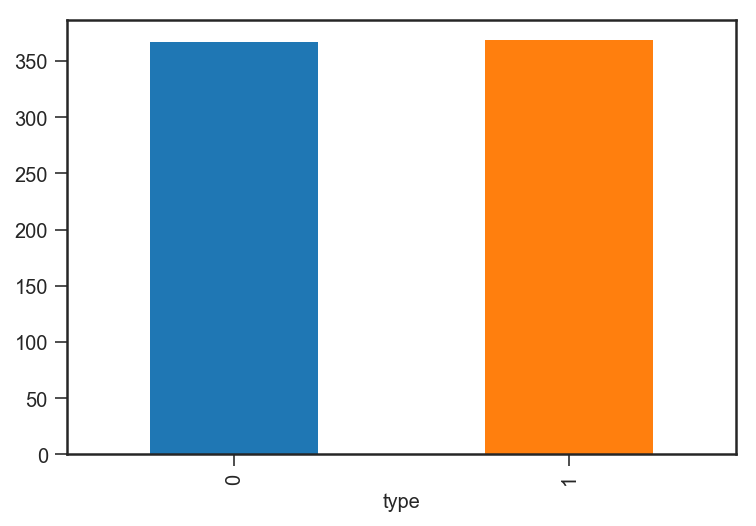

In [16]:
#Balkendiagramm zur Hypothese 3:
rt_type = df_by_subj.groupby("type").mean()["response_time"]
rt_type.plot(kind = "bar")

In [17]:
#Definieren von zwei Subsamples mit Stimulus "Mensch" und "Greeble" bzgl. der Treffsicherheit
type_human = df_by_subj.query("type == 0")["accuracy"]
type_greeble = df_by_subj.query("type == 1")["accuracy"]

#T-Test für Gruppen mit Stimulus "Mensch" und Stimulus "Greeble" hinsichtlich der Treffsicherheit; Hypothese 4:
#"Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die Treffsicherheit besser"
ttest_ind(type_human, type_greeble)

Ttest_indResult(statistic=-0.23295608936194065, pvalue=0.8184239572136915)

Mit einem t-Wert von 0,23 und einem p-Wert von 0,82 ist der Unterschied zwischen den beiden Gruppen nicht signifikant. Die Art des Stimulus hat somit keinen signifikanten Einfluss auf die Treffsicherheit.

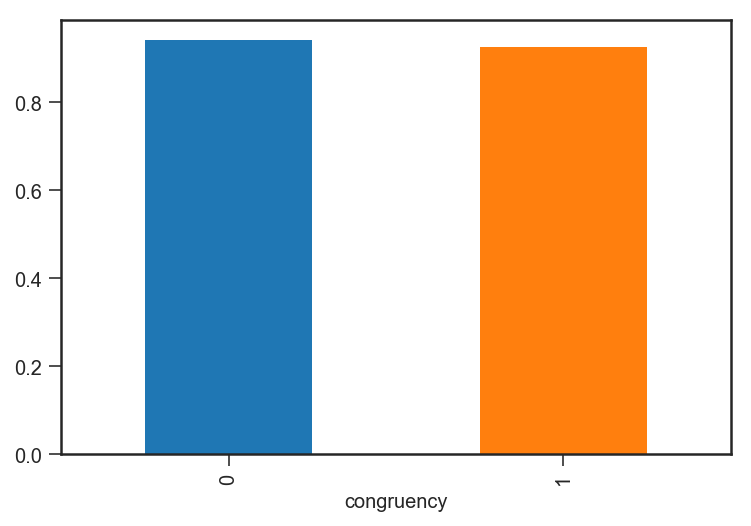

In [18]:
#Balkendiagramm zur Hypothese 4
acc_congruency = df_by_subj.groupby("congruency").mean()["accuracy"]
acc_congruency.plot(kind = "bar")

Hier ist augenscheinlich eine leichte Tendenz zu verbesserter Treffsicherheit für kongruente Stimuli zu erkennen.

# Hypothesentestung

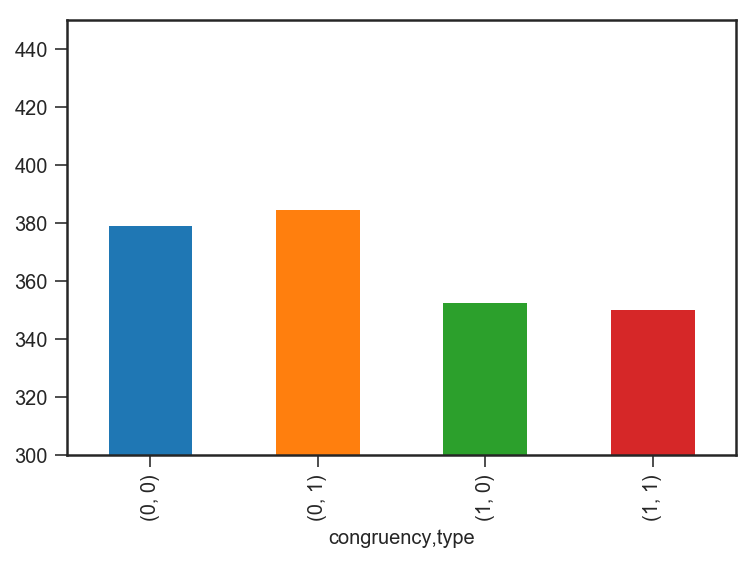

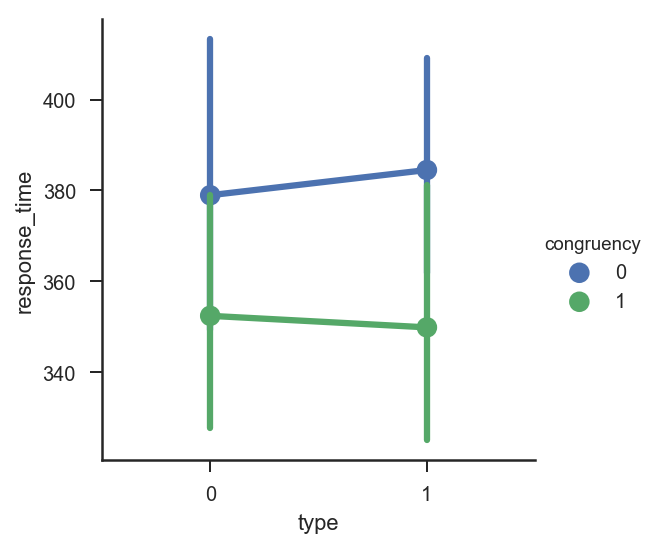

In [19]:
#Grafische Darstellung aller vier Bedingungen bzgl. der Reaktionszeit
#Congruency: 0 = inkongruente Bedingung, 1 = kongruente Bedingung
#Type: 0 = Greeble, 1 = Mensch

rt_cond = df.groupby(["congruency", "type"])["response_time"]
rt_cond.mean().plot(kind="bar", ylim = [300,450])

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="type", y="response_time", hue = "congruency", data=df)

Augenscheinlich ist eine Tendenz zu verbesserter Reaktionszeit bei kongruenten Stimuli zu erkennen, wobei sich die Art des Stimulus nicht auf diesen Effekt auszuwirken scheint.

In [20]:
#Im Folgenden sollen die Hypothesen zur Reaktionszeit getestet werden.
# Hypothesen 1, 3 und 5

#1) Wenn sich die Stimuli ansehen, ist die Reaktionszeit niedriger im Vergleich zu Trials mit sich nicht ansehenden Stimuli.
#3) Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die Reaktionszeit niedriger im Vergleich zu Trials mit Greebles.
#5) Es gibt einen Interaktionseffekt zwischen Typ des Stimulus und Kongruenz der Blickrichtung bezüglich der RT

import statsmodels.formula.api as smf
import numpy as np

formula = "np.log(response_time) ~ congruency * type"
mdl = smf.mixedlm(formula, data=df, groups="subject_nr")
res = mdl.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:            MixedLM Dependent Variable: np.log(response_time)
No. Observations: 317     Method:             REML                 
No. Groups:       5       Scale:              0.0548               
Min. group size:  62      Likelihood:         -5.0376              
Max. group size:  64      Converged:          Yes                  
Mean group size:  63.4                                             
--------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept             5.881     0.079  74.810  0.000   5.727   6.036
congruency           -0.036     0.043  -0.834  0.404  -0.121   0.049
type                  0.024     0.030   0.786  0.432  -0.036   0.083
congruency:type      -0.031     0.061  -0.503  0.615  -0.150   0.089
groups RE             0.029     0.090                               
===================================================================

"""

Weder die Kongruenz der Stimuli, noch die Art des Stimulus haben einen signifikanten Einfluss auf die Reaktionszeit (p = 0,404 für congruency, p = 0,432 für type). Auch der Test zum Interaktionseffekt wird mit p = 0,615 nicht signifikant. Somit müssen die Hypothesen 1, 3 und 5 abgelehnt werden.

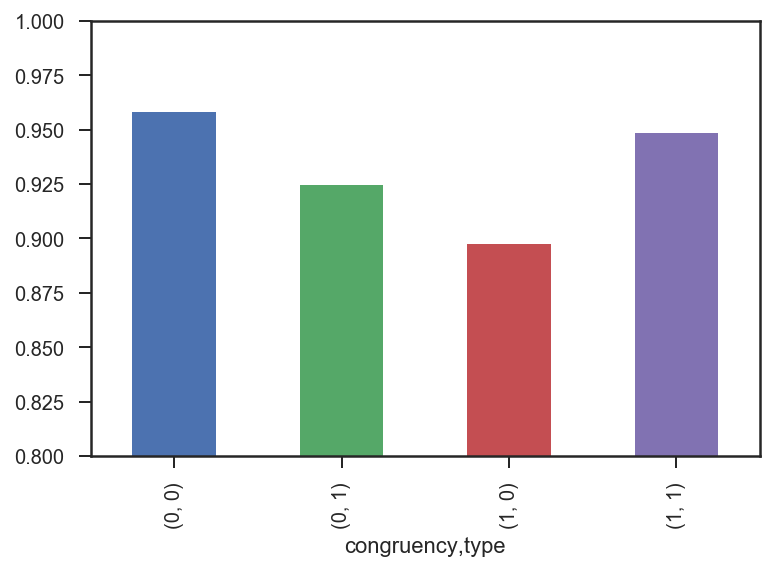

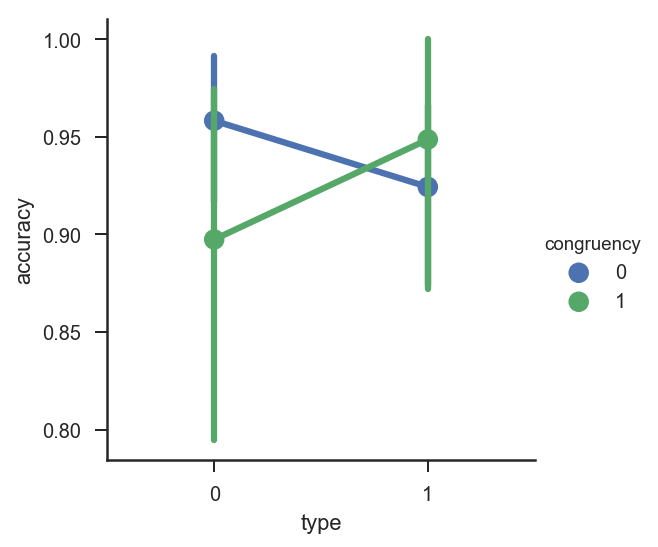

In [21]:
#Grafische Darstellung aller vier Bedingungen bzgl. der Treffsicherheit
#Congruency: 0 = inkongruente Bedingung, 1 = kongruente Bedingung
#Type: 0 = Greeble, 1 = Mensch

rt_cond = df.groupby(["congruency", "type"])["accuracy"]
rt_cond.mean().plot(kind="bar", ylim = [0.8, 1])

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="type", y="accuracy", hue = "congruency", data=df)

Bei der Treffsicherheit kann augenscheinlich ein Interaktionseffekt erkannt werden. Bei Menschen (type = 0) ist die Treffsicherheit für inkongruente Stimuli besser als für kongruente. Für Greebles ist das Gegenteil der Fall. Leicht verbesserte Treffsicherheit für sich ansehende Stimuli.

In [22]:
#Im Folgenden sollen die Hypothesen zur Treffsicherheit getestet werden.
# Hypothesen 2, 4 und 6

#2) Wenn sich die Stimuli ansehen, ist die Treffsicherheit besser im Vergleich zu Trials mit sich nicht ansehenden Stimuli.
#4) Wenn es sich bei dem Stimulus um einen Mensch handelt, ist die Treffsicherheit verbessert im Vergleich zu Trials mit Greebles.
#6) Es gibt einen Interaktionseffekt zwischen Typ des Stimulus und Kongruenz der Blickrichtung bezüglich der Accuracy

import statsmodels.api as sm

df["congruencyXtype"] = df["type"] * df["congruency"]
mod = sm.NominalGEE(df["accuracy"], df[["type", "congruency", "congruencyXtype"]],
                     groups=df["subject_nr"])
res = mod.fit()
res.summary()

/Users/jona/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                           NominalGEE Regression Results                           
===================================================================================
Dep. Variable:                    accuracy   No. Observations:                  317
Model:                          NominalGEE   No. clusters:                        5
Method:                        Generalized   Min. cluster size:                  62
                      Estimating Equations   Max. cluster size:                  64
Family:                       _Multinomial   Mean cluster size:                63.4
Dependence structure:  NominalIndependence   Num. iterations:                     2
Date:                     Tue, 20 Mar 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         17:02:24
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
type[0.0]               -2.5033      0.431     -5.813      0.000      -3.347      -1.659
congruency[0.0]         -2.1691      0.453     -4.788      0.000      -3.057      -1.281
congruencyXtype[0.0]     1.7545      0.634      2.768      0.006       0.512       2.997
==============================================================================
Skew:                          1.5408   Kurtosis:                       3.4435
Centered skew:                 1.3932   Centered kurtosis:              2.9608
==============================================================================
"""

Im Bezug auf die Treffsicherheit können signifikante Effekte für die Kongruenz der Stimuli (p < 0,001) und die Art des Stimulus (p < 0,001) gefunden werden. Jedoch wurde - entgegen der Hypothese 2 - eine verbesserte Treffsicherheit für voneinander abgewandte Stimuli gefunden. Bei der Stimulusart konnte für menschliche Stimuli eine bessere Treffsicherheit gefunden werden, was Hypothese 4 entspricht.
Der Interaktionseffekt wird mit p = 0,006 knapp nicht signifikant.

Somit kann die Hypothese 4 bestätigt werden, Hypothesen 2 und 6 müssen hingegen abgelehnt werden.

# Diskussion

Für die zwei Bedingungen "Kongruenz der Blickrichtung" und "Art des Stimulus" konnten folgende Auswirkungen auf die Reaktionszeit und die Treffsicherheit bei der Bestimmung der Stimulusart gefunden werden:

Für einander zugewandte Stimuli, also mit kongruenter Blickrichtung, konnte eine Tendenz zu verbesserter Reaktiongeschwindigkeit gefunden werden, die jedoch nicht signifikant wurde. Hierbei hatte die Art des Stimulus keinen Einfluss auf den Effekt, menschliche Stimuli werden also nicht signifikant schneller verarbeitet als Greebles.

Hinsichtlich der Treffsicherheit konnte ein signifikanter Effekt für kongruente Stimuli und Art des Stimulus gefunden werden. Demnach werden menschliche Stimuli signifikant häufiger richtig benannt als Greebles und auch die Kongruenz der Blickrichtung hatte einen signifikanten Einfluss auf die Treffsicherheit, jedoch entgegen der Hypothese, nämlich verbesserte Treffsicherheit für inkongruente Stimuli. Der Interaktionseffekt bzgl. der Treffsicherheit wurde nicht signifikant.

Somit konnte nur eine der fünf Hypothesen bestätigt werden, was jedoch aufgrund der sehr kleinen Stichprobe von n = 5 nicht verwunderlich ist.